In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import  Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

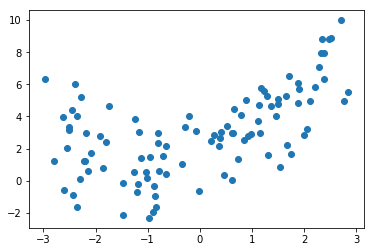

In [2]:
X = np.random.uniform(-3,3,100)
x = X.reshape(-1,1)
y = 0.5*x**2 + x + 2 + np.random.normal(0,2,size=100).reshape(-1,1)
plt.scatter(x,y)
plt.show()
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [3]:
def getpoly(degree):
    poly = Pipeline([("polynomial",PolynomialFeatures(degree=degree)),
                     ("scaler",StandardScaler()),
                     ("linear",LinearRegression())])
    return poly

In [4]:
poly2 = getpoly(degree=20)
poly2.fit(X_train,y_train)
y_predict = poly2.predict(X_train)
mean_squared_error(y_test,poly2.predict(y_test))

1.0626218813130165e+31

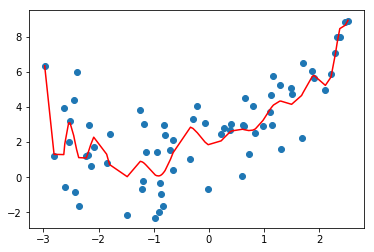

In [5]:
plt.scatter(X_train,y_train)
plt.plot(np.sort(X_train,axis=0),y_predict[np.argsort(X_train,axis=0)].reshape(-1,1),color = 'red')


In [6]:
def getpolyregular(degree,alpha):
    poly = Pipeline([("polynomial",PolynomialFeatures(degree=degree)),
                     ("scaler",StandardScaler()),
                     ("regular",Ridge(alpha = alpha))
                     # ("linear",LinearRegression())
                     ])
    return poly

In [7]:
poly3 = getpolyregular(degree=20,alpha=100)
poly3.fit(X_train,y_train)
y_predict2 = poly3.predict(X_train)
mean_squared_error(y_test,poly3.predict(y_test))

1.0205094443169284e+19

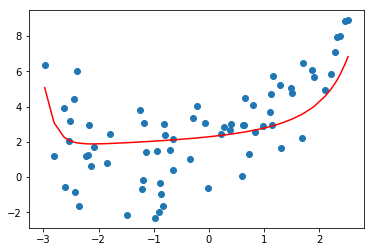

In [8]:
plt.scatter(X_train,y_train)
plt.plot(np.sort(X_train,axis=0),y_predict2[np.argsort(X_train,axis=0)].reshape(-1,1),color = 'red')

In [9]:
def getpolylassoregular(degree,alpha):
    poly = Pipeline([("polynomial",PolynomialFeatures(degree=degree)),
                     ("scaler",StandardScaler()),
                     ("regular",Lasso(alpha = alpha))
                     # ("linear",LinearRegression())
                     ])
    return poly

In [17]:
poly4 = getpolylassoregular(degree=20,alpha=0.4)
poly4.fit(X_train,y_train)
y_predict3 = poly4.predict(X_train)
mean_squared_error(y_test,poly4.predict(y_test))



6009.325342823414

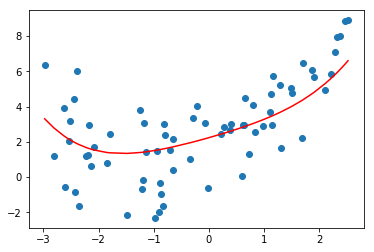

In [18]:
plt.scatter(X_train,y_train)
plt.plot(np.sort(X_train,axis=0),y_predict3[np.argsort(X_train,axis=0)].reshape(-1,1),color = 'red')
